In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

df = yf.download('TSLA', period = '6mo') # Gets the last 6 months of Tesla data
print(df.head())

print(df.isnull().sum()) # Checks for missing data

df = df.dropna() # Drops any NaN values if necessary

Close_data = df # Prepare for functions

plt.plot(df['Close'])
plt.title('Closing Prices')
plt.show()


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

df = yf.download('TSLA', period = '5y')
print(df.isnull().sum()) # Checks to see if there are any missing data
df = df.dropna() # Gets rid of NaN data

print(f"Date range: {df.index[0]} to {df.index[-1]}") # Checks the full range of the data

print(df.head(20)) # Increases number to see more rows

print(df.tail()) # Prints the last 5 rows
plt.figure(figsize=(10, 5)) # Creates a new figure
plt.title('TESLA Closing Prices for the past 5 years')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.plot(df['Close'])
plt.grid(True)

df['MA'] = df['Close'].rolling(20).mean().shift(1) # Calcualtes the simple MA and adds a column to the data frame

# print(df.tail())
plt.figure(figsize=(10, 5))
plt.title('TESLA Closing Prices overlaid with simple moving average values')
plt.plot(df['Close'], color = 'red') # Plots both the Close and the MA on the same figure
plt.plot(df['MA'], color = 'blue')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)

plt.show


C:\Users\HutchinsS\AppData\Local\Temp\ipykernel_25064\844028576.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER, period = PERIOD)
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume  \
Ticker             SPY         SPY         SPY         SPY       SPY   
Date                                                                   
2025-07-24  634.419983  636.150024  633.989990  634.599976  71307100   
2025-07-25  637.099976  637.580017  634.840027  635.090027  56865400   
2025-07-28  636.940002  638.039978  635.539978  637.479980  54917100   
2025-07-29  635.260010  638.669983  634.340027  638.349976  60514000   
2025-07-30  633.659973  637.669983  633.460022  635.919983  40150809   

Price               MA  
Ticker                  
Date                    
2025-07-24  622.417001  
2025-07-25  623.782001  
2025-07-28  625.043500  
2025-07-29  626.145001  
2025-07-30  627.015503  


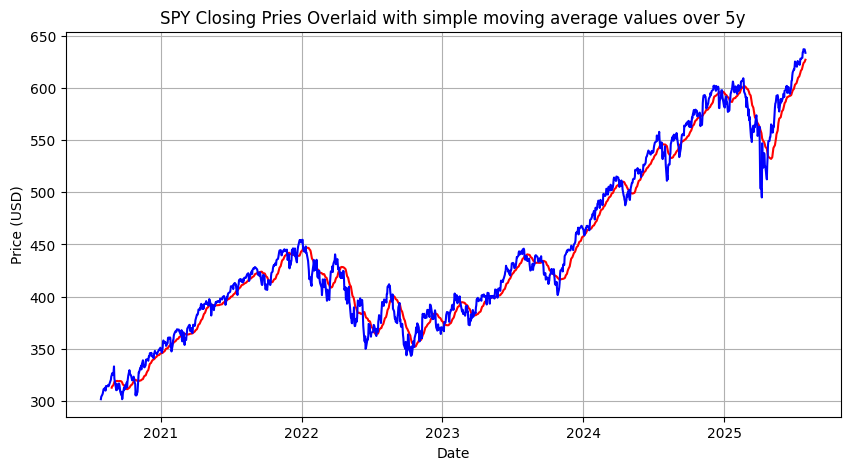

In [27]:
%reset -f
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



def get_data_from_yfinance(TICKER, PERIOD):
    df = yf.download(TICKER, period = PERIOD)
    df = df.dropna()

    return df


def flexible_plotter(title, dataset_1, dataset_2, xlabel, ylabel):
    
    plt.figure(figsize=(10,5))
    plt.title(title)
    plt.grid(True)

    plt.plot(dataset_1, color = 'red')
    plt.plot(dataset_2, color = 'blue')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

def Moving_Average_Values(df,rolling_value):
    df['MA'] = df['Close'].rolling(20).mean().shift(1)
    print(df.tail())
    return df['MA']
    

def main():
    # Configuration

    TICKER = 'SPY'
    PERIOD = '5y'

    # Workflow
    df = get_data_from_yfinance(TICKER, PERIOD)
    # print(df.tail())

    rolling_value = 20
    
    Moving_Average_Values(df, rolling_value)
    

    title = f'{TICKER} Closing Pries Overlaid with simple moving average values over {PERIOD}'
    dataset_1 = df['MA']
    dataset_2 = df['Close']
    xlabel = 'Date'
    ylabel = 'Price (USD)'

    flexible_plotter(title, dataset_1, dataset_2, xlabel, ylabel)

if __name__ == '__main__':
    main()


